# Exercício
## Aproximação de funções (Regressão)
### Alunos (Nome e número usp):
 - Fernanda Tostes Marana (4471070)
 - Matheus Aparecido do Carmo Alves (9791114)
 - Thais Bianchini (9791010)
---

Para esse exercício, carregue a base de dados `dados.txt`. Esta base possui 14 variáveis independentes, organizados em 14 colunas. A 15ª coluna representa a variável dependente (o valor da função).



---
### Questão 01.

Carregue os dados em uma estrutura Pandas DataFrame. Utilize um regressor linear nesse conjunto de dados e calcule seu erro quadrático médio (mean squared error - MSE)

In [0]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Reading the data
data = pd.read_csv('dados.txt', sep=",", header=0)
data

# Spliting the parameters form the result
X, Y = data.iloc[:,:-1],data.iloc[:,-1]
print('X =',X)
print('Y =',Y)

# Fitting the dataset via Linear Regression
regression_f = LinearRegression().fit(X,Y)

# Applying the function over the parameters
Y_predict_lin = regression_f.predict(X)

# Calculating the MSE between the predict value and the true value
mse_lin = mean_squared_error(Y,Y_predict_lin)
print('\n=====\nMSE =',mse_lin,'\n=====')

X =          VL     VM     VP      M   VMVL  ...     H    Vv   DirV    MHE    MLR
0    1849.0  209.0   62.0  245.0  11.75  ...  48.0  1.15  115.0   4.01  30.18
1     580.0   48.0   88.0  137.0   8.60  ...  42.0  1.40   20.0  17.69  13.70
2    1438.0  207.0  108.0  386.0  11.80  ...  28.0  0.60  170.0   3.49  38.37
3     651.0   58.0   23.0   46.0   9.60  ...  64.0  0.00  159.0   5.33  32.97
4     623.0   55.0   82.0  141.0   5.10  ...  46.0  0.70   27.0  17.69  13.70
..      ...    ...    ...    ...    ...  ...   ...   ...    ...    ...    ...
459   351.0   33.0   30.0   66.0   7.60  ...  35.0  0.50   54.0  14.31   8.27
460  1423.0  134.0   77.0  341.0  10.50  ...  61.0  0.45  108.0   3.49  38.37
461   584.0   84.0   71.0  187.0   7.90  ...  57.0  1.00  139.0  20.61   8.73
462  1847.0  156.0   34.0  252.0  11.80  ...  32.0  2.32   26.0   4.01  30.18
463   542.0   43.0   95.0  193.0   6.70  ...  29.0  1.80  127.0  20.61   8.73

[464 rows x 14 columns]
Y = 0      7.1
1      5.9
2      9.

---
### Questão 02.

Agora faça regressão polinomial nos dados, utilizando um polinômio de grau 2. Calcule seu MSE.

* Dica: Utilize a classe importada para *transformar* os dados para uma regressão polinomial de grau 2. Mais informações sobre como o processo podem ser encontradas dentro da pasta do projeto.


In [0]:
from sklearn.preprocessing import PolynomialFeatures

# Performing a Polynomial-2 fitting over the dataset
polynomial_f = PolynomialFeatures(2)
X_polynomial_2 = polynomial_f.fit_transform(X)

# Fitting the dataset via Linear Regression over the transformed X
refression_f = LinearRegression(fit_intercept=False)
regression_f = LinearRegression().fit(X_polynomial_2,Y)

# Applying the function over the parameters
Y_predict_p2 = regression_f.predict(X_polynomial_2)

# Calculating the MSE between the predict value and the true value
mse_p2 = mean_squared_error(Y,Y_predict_p2)
print('\n=====\nMSE =',mse_p2,'\n=====')



=====
MSE = 3.6706513916306416 
=====


---

### Questão 03.

Por fim, faça regressão polinomial utilizando um polinômio de grau 3. Verifique qual das 3 abordagens adotada produz o menor erro quadrático médio.


In [0]:
# Performing a Polynomial-3 fitting over the dataset
polynomial_f = PolynomialFeatures(3)
X_polynomial_3 = polynomial_f.fit_transform(X)

# Fitting the dataset via Linear Regression over the transformed X
refression_f = LinearRegression(fit_intercept=False)
regression_f = LinearRegression().fit(X_polynomial_3,Y)

# Applying the function over the parameters
Y_predict_p3 = regression_f.predict(X_polynomial_3)

# Calculating the MSE between the predict value and the true value
mse_p3 = mean_squared_error(Y,Y_predict_p3)
print('\n=====\nMSE =',mse_p3,'\n=====')


=====
MSE = 6.881512519039691e-20 
=====


#### **RESPOSTA.** 

Como pode-se observar, comparando os valores apresentados abaixo, a estratégia que apresentou melhor resultado foi a Regressão sobre o Polinomio de 3 grau do conjunto de dados.

In [0]:
print('Linear MSE =',mse_lin)
print('Polynomial-2 MSE =',mse_p2)
print('Polynomial-3 MSE =',mse_p3)

Linear MSE = 3.891123825552584
Polynomial-2 MSE = 3.6706513916306416
Polynomial-3 MSE = 6.881512519039691e-20


Construindo-se um gráfico (com o intervalo reduzido) das funções geradas, pode-se verificar visualmente o resultado obtido.

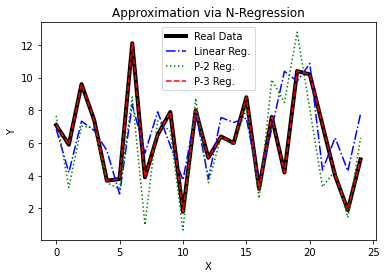

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(Y[0:25],label='Real Data',linewidth=4,color='black')
plt.plot(Y_predict_lin[0:25],label='Linear Reg.',linestyle='-.',color='b')
plt.plot(Y_predict_p2[0:25],label='P-2 Reg.',linestyle=':',color='g')
plt.plot(Y_predict_p3[0:25],label='P-3 Reg.',linestyle='--',color='r')

plt.title('Approximation via N-Regression')
plt.legend()
plt.ylabel('Y')
plt.xlabel('X')
plt.show()